# Wyznaczanie Położenia Gwiazdy w Układzie Współrzędnych Lokalnych


Autor: **Radosław Dąbkowski**

Numer indeksu: **325683**

### Wprowadzenie
Celem tego sprawozdania jest przedstawienie wyników obliczeń dotyczących położenia danej gwiazdy na niebie, w układzie współrzędnych lokalnych (horyzontalnych), dla dwóch różnych miejsc na powierzchni Ziemi.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def dms2deg(dms):
    d = dms[0]
    m = dms[1]
    s = dms[2]
    
    deg = d+m/60+s/3600
    return deg

def deg2dms(dd):
    deg = int(np.trunc(dd))
    mnt = int(np.trunc((dd-deg) * 60))
    sec = ((dd-deg) * 60 - mnt) * 60
    dms = [deg, abs(mnt), abs(sec)]
    # print(str(deg)+chr(176)+"%0.2d" % abs(mnt)+'\''+"%08.5f" % abs(secq)+'\"')
    return dms

def hms2rad(dms):
    d = dms[0]
    m = dms[1]
    s = dms[2]
    
    deg = d+m/60+s/3600
    rad = np.deg2rad(deg*15)
    return rad

def dms2rad(dms):
    d = dms[0]
    m = dms[1]
    s = dms[2]
    
    deg = d+m/60+s/3600
    rad = np.deg2rad(deg)
    return rad

def hms2sec(hms):
    sec = hms[0]*3600 + hms[1] * 60 + hms[2]
    return sec

def sec2hms(s):
    hd = s/3600
    h = int(np.trunc(hd))
    m = int(np.trunc((hd-h) * 60))
    s = ((hd-h) * 60 - m) * 60
    hms = [h,abs(m),abs(s)]
    return hms

def rad2hms(rad):
    dd = np.rad2deg(rad)
    dd = dd/15
    deg = int(np.trunc(dd))
    mnt = int(np.trunc((dd-deg) * 60))
    sec = ((dd-deg) * 60 - mnt) * 60
    dms = [deg, abs(mnt), abs(sec)]
    return dms

def rad2dms(rad):
    dd = np.rad2deg(rad)
    dd = dd
    deg = int(np.trunc(dd))
    mnt = int(np.trunc((dd-deg) * 60))
    sec = ((dd-deg) * 60 - mnt) * 60
    dms = [deg, abs(mnt), abs(sec)]
    return dms

def dms2hms(dms):
    sall = dms[0] * (4*60) + dms[1] * 4 + dms[2]/15    
    h = int(sall//3600)
    m = int((sall%3600)//60)
    s = sall%60
    return [h,m,s] 

def julday(y,m,d,h):
    '''
    Simplified Julian Date generator, valid only between
    1 March 1900 to 28 February 2100
    '''
    if m <= 2:
        y = y - 1
        m = m + 12
    # A = np.trunc(y/100)
    # B = 2-A+np.trunc(A/4)
    # C = np.trunc(365.25*y)
    # D = np.trunc(30.6001 * (m+1))
    # jd = B + C + D + d + 1720994.5
    jd = np.floor(365.25*(y+4716))+np.floor(30.6001*(m+1))+d+h/24-1537.5;
    return jd

def GMST(jd):
    '''
    calculation of Greenwich Mean Sidereal Time - GMST in hours
    ----------
    jd : TYPE
        julian date
    '''
    T = (jd - 2451545) / 36525
    Tu = jd - 2451545
    g = 280.46061837 + 360.98564736629*(jd - 2451545.0) + 0.000387933*T**2-T**3/38710000
    g = (g%360) / 15
    return g

### Metodologia

Aby wyznaczyć położenie gwiazdy RA FK5 699 w układzie współrzędnych lokalnych dla dwóch różnych miejsc na Ziemi, zastosowano następujące kroki:

1. Wybrano dwie lokalizacje na Ziemi, dla których obliczenia miały zostać wykonane. W tym sprawozdaniu wybrano lokalizacje:
    Lokalizacja A: Szerokość geograficzna 52°N, Długość geograficzna 21°W (Warszawa).
    Lokalizacja B: Szerokość geograficzna 0°N, Długość geograficzna 21°E (Równik).
2. Dla każdej z tych lokalizacji oraz wybranej gwiazdy obliczono współrzędne horyzontalne (azymut i wysokość) w godzinnych interwałach w ciągu doby, 1 lipca 2023 roku.

### Obliczenia

Współrzędne gwiazdy RA FK5 699 w układzie równikowym ekwinokcjalnym na epokę 2023.5 wynoszą:


In [6]:
RA = [18, 37, 44.096]
DEC = [38, 48, 24.290]

In [8]:
# obliczenia pozycji gwiazdy

warsaw_lat: float = 52
warsaw_lon: float = 21
equator_lat: float = 0
equator_lon: float = 21

warsaw = []
equator = []

for i in range(1,25):
    jd = julday(2023,7,1,i)
    GMST0 = GMST(jd)
    # warsaw
    LST = GMST0 + warsaw_lon/15
    h = LST - hms2rad(RA)
    Az = np.arctan2(np.sin(h), np.cos(h)*np.sin(warsaw_lat) - np.tan(dms2rad(DEC))*np.cos(warsaw_lat))
    h = np.arcsin(np.sin(warsaw_lat)*np.sin(dms2rad(DEC)) + np.cos(warsaw_lat)*np.cos(dms2rad(DEC))*np.cos(h))
    warsaw.append([Az,h])

    # equator
    LST_e = GMST0 + equator_lat/15
    h_e = LST_e - hms2rad(RA)
    Az_e = np.arctan2(np.sin(h_e), np.cos(h_e)*np.sin(equator_lat) - np.tan(dms2rad(DEC))*np.cos(equator_lat))
    h_e = np.arcsin(np.sin(equator_lat)*np.sin(dms2rad(DEC)) + np.cos(equator_lat)*np.cos(dms2rad(DEC))*np.cos(h_e))
    equator.append([Az_e,h_e])


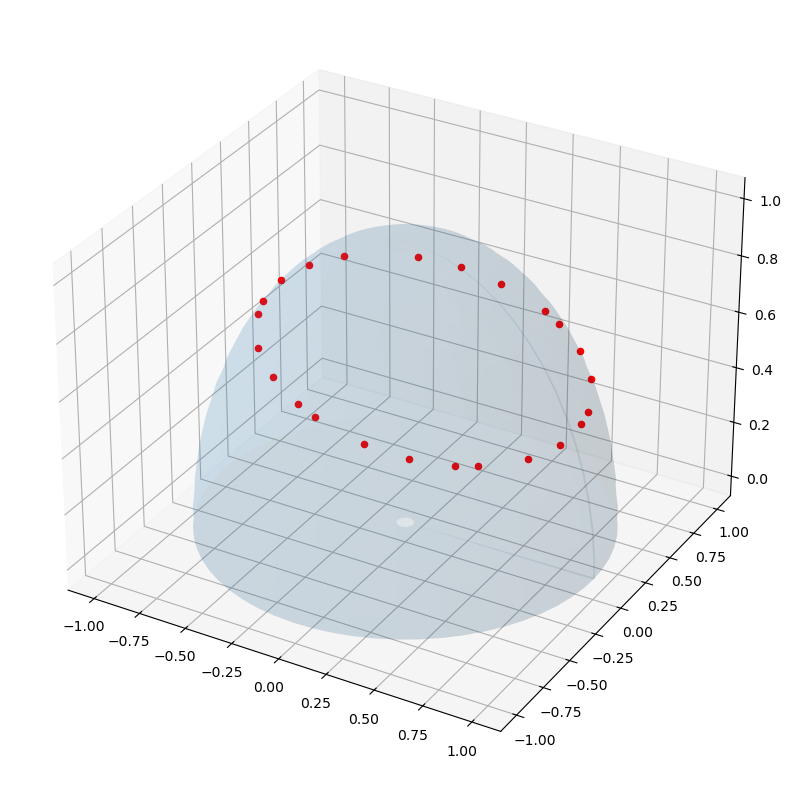

In [9]:
# wykres skyplot dla Warszawy
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
# promień Ziemi
r = 1
# siatka wspołrzędnych
u, v = np.mgrid[0:(2 * np.pi+0.1):0.1, 0:np.pi:0.1]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
z[z<0] = 0		# bez tego, narysowalibyśmy całą kulę, a chcemy tylko półkulę
ax.plot_surface(x,y,z, alpha = 0.1)

for Az, h in warsaw:
    x = r*np.cos(Az)*np.cos(h)
    y = r*np.sin(Az)*np.cos(h)
    z = r*np.sin(h)
    ax.scatter(x,y,z, color = 'red')

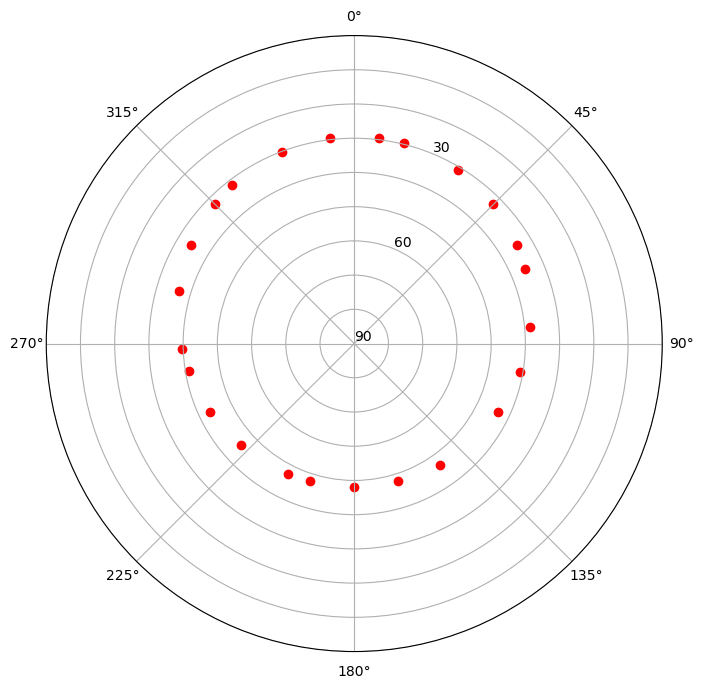

In [10]:
# wykres plot3D dla Warszawy
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.set_theta_zero_location('N') # ustawienie kierunku północy na górze wykresu
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10)) # Define the yticks

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

for Az, h in warsaw:
    ax.scatter(Az, 90-np.rad2deg(h), color = 'red')


Gwiazda RA FK5 699, jak widać na powyższym wykresie elonguje dla obserwatora w Warszawie 1 lipca 2023.

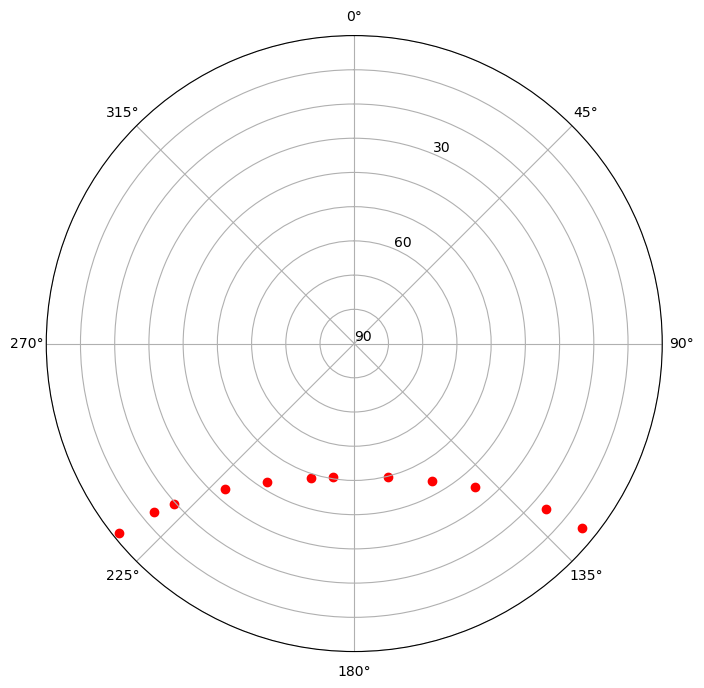

In [11]:
# wykres plot3D dla równika
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.set_theta_zero_location('N') # ustawienie kierunku północy na górze wykresu
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10)) # Define the yticks

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

for Az, h in equator:
    ax.scatter(Az, 90-np.rad2deg(h), color = 'red')